<a href="https://colab.research.google.com/github/cdg-idera/PythonNotebooks/blob/main/metadatos_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Crear un directorio llamado "mi_directorio"

!ls


imagenes  sample_data


**Montar** el directorio del Drive de la cuenta de cdg.idera@ en el directorio drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cambio de directorio al directorio imágenes donde tengo una imágen satelital.

In [39]:
# Cambiar al directorio de Google Drive
import os
os.chdir('/content/drive/MyDrive/imagenes')

In [40]:
!ls

LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif


Instalar rasterio si no está instalado en colab

In [42]:
#! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.5 MB/s eta 0:00:00


In [43]:
import rasterio

In [44]:
imagen_satelital = rasterio.open(r"LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif")

Cantidad de bandas: propiedad count

In [46]:
imagen_satelital.count

7

In [48]:
imagen_satelital.width


4926

In [49]:
imagen_satelital.height

3484

In [50]:
imagen_satelital.bounds

BoundingBox(left=494356.5212026284, bottom=455232.36541813484, right=642109.8165256245, top=559730.7462181349)

In [51]:
imagen_satelital.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]')

In [52]:
imagen_satelital.indexes

(1, 2, 3, 4, 5, 6, 7)

In [54]:
from rasterio.plot import show

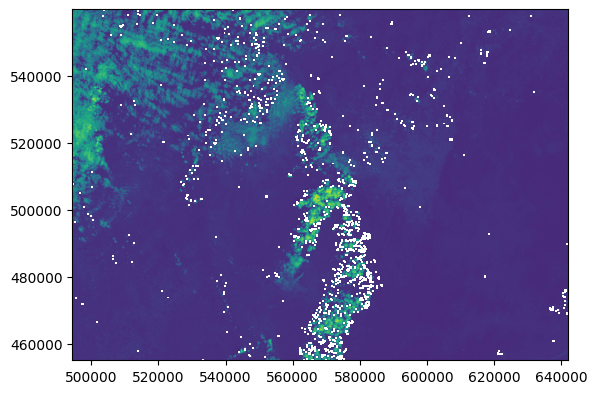

<Axes: >

In [55]:
show(imagen_satelital)

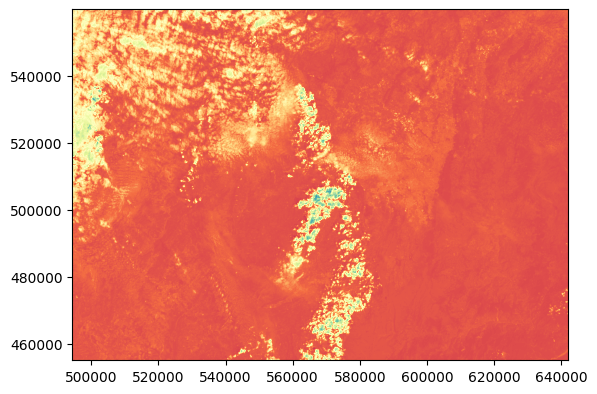

<Axes: >

In [56]:
show((imagen_satelital, 4), cmap = "Spectral")

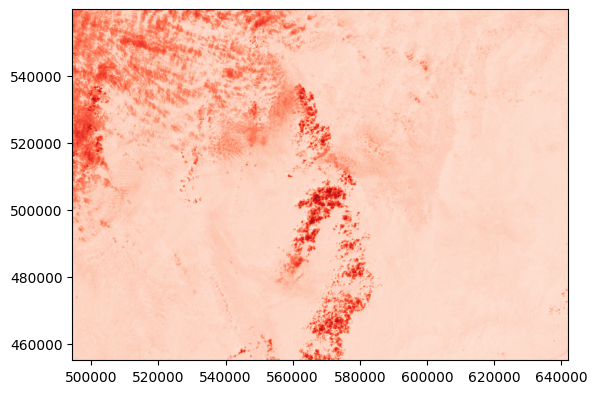

<Axes: >

In [57]:
show((imagen_satelital, 3), cmap = "Reds")

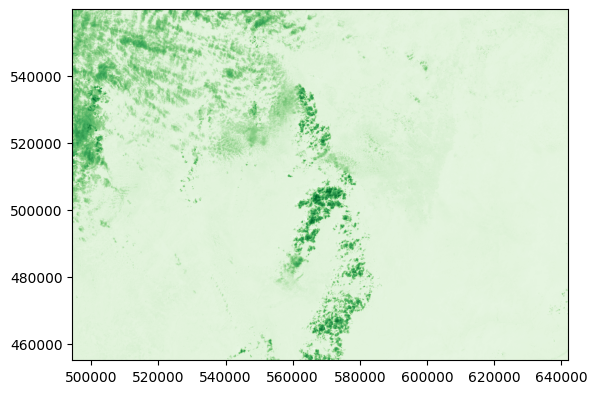

<Axes: >

In [58]:
show((imagen_satelital, 2), cmap = "Greens")

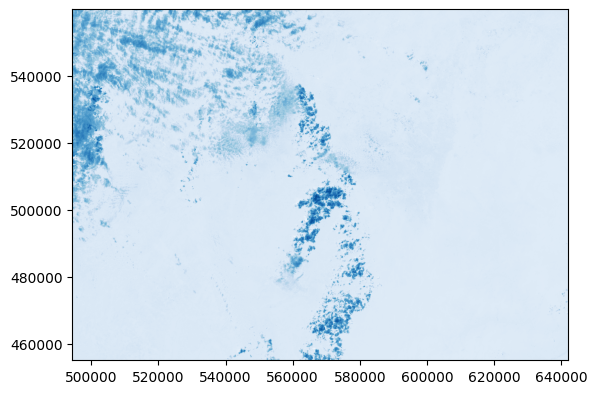

<Axes: >

In [59]:
show((imagen_satelital, 1), cmap = "Blues")

In [92]:
banda_azul = imagen_satelital.read(1)
banda_azul

array([[27498, 27762, 27454, ...,  7943,  8612,  9047],
       [27575, 28229, 27793, ...,  8471,  9689, 10224],
       [29099, 29306, 28551, ...,  8595,  9641, 10528],
       ...,
       [ 8539,  8642,  8818, ...,  8094,  8128,  8111],
       [ 8150,  8426,  8764, ...,  8059,  8114,  8068],
       [ 8006,  8348,  8162, ...,  8094,  8054,  8104]], dtype=uint16)

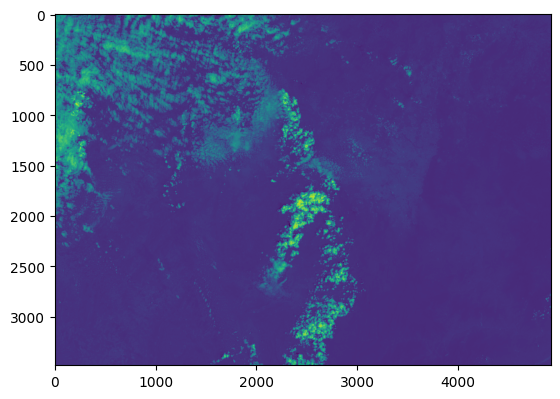

<Axes: >

In [93]:
show(banda_azul)

In [94]:
banda_verde = imagen_satelital.read(2)
banda_verde


array([[27797, 27826, 27283, ...,  9091,  9917, 10471],
       [27294, 27874, 27422, ...,  9493, 10761, 11559],
       [28613, 28906, 28121, ...,  9643, 10669, 11388],
       ...,
       [ 8879,  9004,  9221, ...,  8130,  8142,  8151],
       [ 8434,  8787,  9218, ...,  8107,  8137,  8109],
       [ 8231,  8649,  8454, ...,  8114,  8083,  8115]], dtype=uint16)

In [95]:
banda_rojo = imagen_satelital.read(3)
banda_rojo

array([[26472, 26993, 27029, ..., 10929, 11363, 11481],
       [27711, 27993, 27672, ..., 11587, 12364, 12907],
       [28421, 28645, 28299, ..., 12046, 13132, 13579],
       ...,
       [10414, 10551, 10702, ...,  8868,  9066,  9007],
       [ 9747, 10237, 10728, ...,  8823,  8907,  8826],
       [ 9543, 10100,  9857, ...,  8806,  8603,  8937]], dtype=uint16)

In [97]:
banda_infrarojo = imagen_satelital.read(4)
banda_infrarojo

array([[25982, 26562, 26476, ..., 11352, 11778, 12072],
       [27057, 27351, 27025, ..., 11880, 12803, 13356],
       [27910, 28156, 27712, ..., 12186, 13338, 13998],
       ...,
       [10321, 10616, 10733, ...,  8286,  8306,  8303],
       [ 9137,  9720, 10508, ...,  8240,  8281,  8228],
       [ 8829,  9638,  9288, ...,  8236,  8111,  8291]], dtype=uint16)

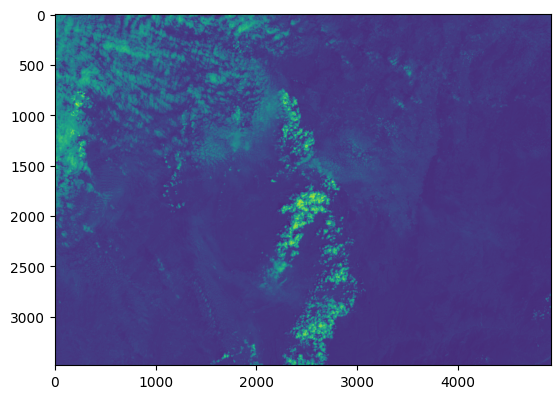

<Axes: >

In [76]:
show(banda_rojo)

In [68]:
banda_azul.min()

0

In [69]:
banda_azul.max()

57368

In [70]:
banda_azul.mean()

10558.01029513493

In [71]:
from rasterio.plot import show_hist

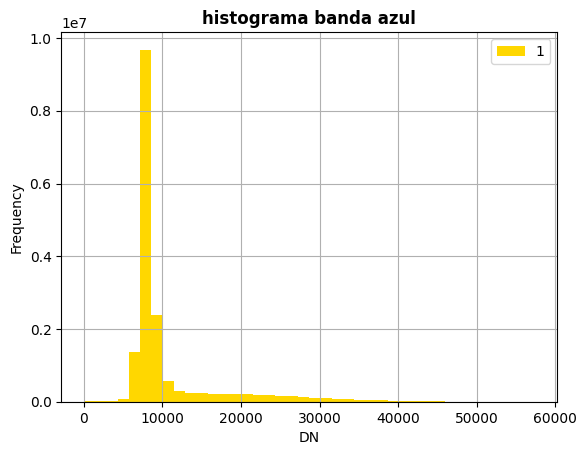

In [73]:
show_hist(banda_azul, bins = 40, title = "histograma banda azul")

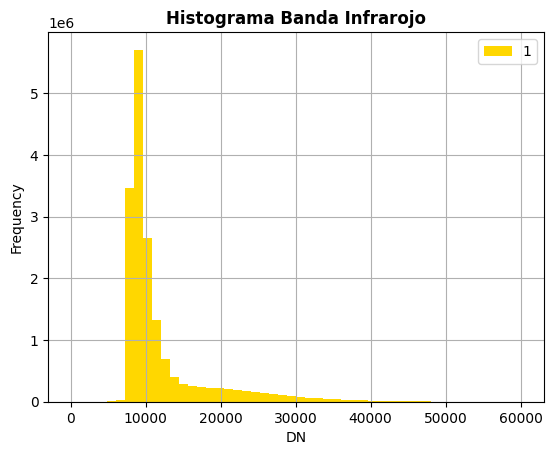

In [99]:

show_hist(banda_infrarojo, bins = 50, title = "Histograma Banda Infrarojo")

In [81]:
import numpy as np


In [82]:
import matplotlib.pyplot as plt


In [114]:
composicion = np.dstack((banda_rojo, banda_verde, banda_azul))

In [115]:
print(composicion.min(), composicion.max())

0 58772


Normalizar los valores a [0, 1]:
Dado que los valores en la imagen composicion están en el rango de 0 a 65535,  dividir todos los valores entre 65535 los normalizará. Esto transformará los valores a un rango flotante [0, 1], adecuado para visualización con imshow().

In [112]:
# Normalizar la imagen (composicion es de tipo uint16, con valores entre 0 y 65535)
composicion_normalizada = composicion / 65535.0

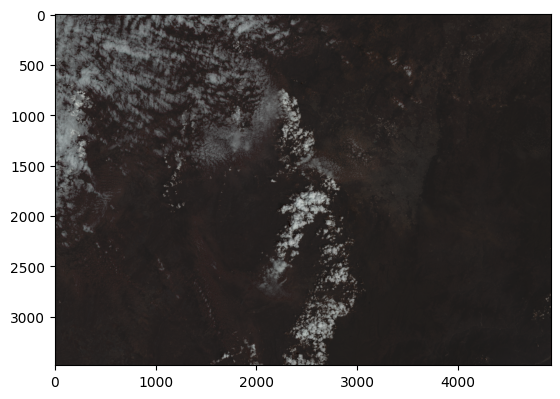

In [113]:
plt.imshow(composicion_normalizada)

In [116]:
composicion = np.dstack((banda_infrarojo, banda_verde, banda_azul))

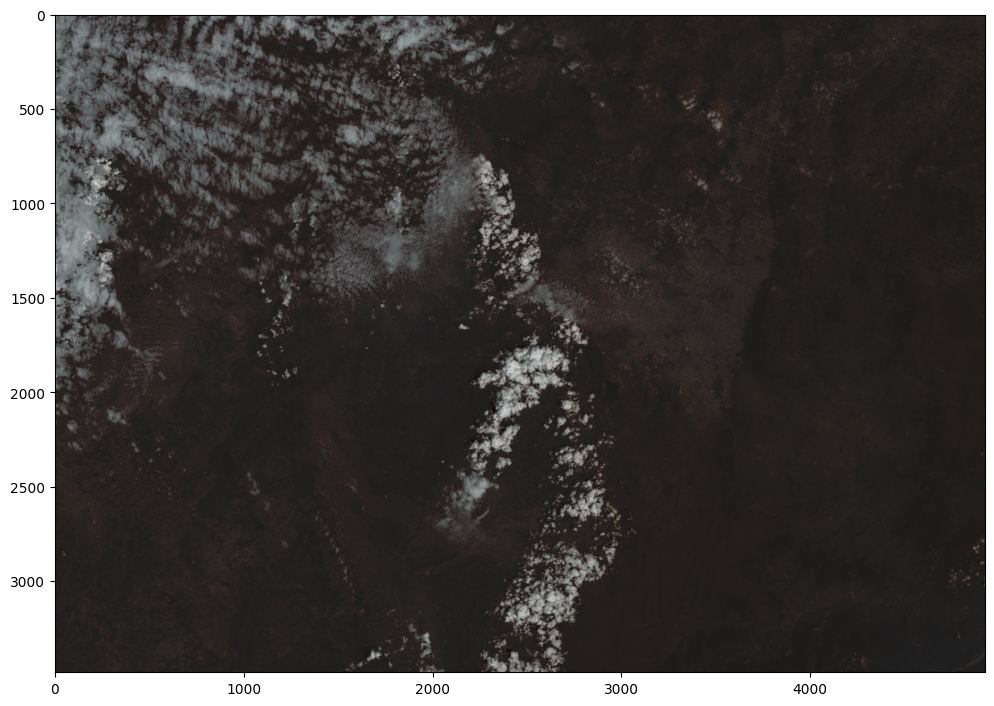

In [120]:
plt.subplots(figsize = (12,12))
composicion_normalizada = composicion / 65535.0
plt.imshow(composicion_normalizada)